In [4]:
import networkx as nx 
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import EoN
import glob
from tqdm import trange
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [5]:
def SEIR_network(G, tau, alpha, gamma, rho, tmax):
    # Initialize states: S=0 (Susceptible), E=1 (Exposed), I=2 (Infected), R=3 (Recovered)
    for node in G.nodes():
        G.nodes[node]['state'] = 0  # Start all nodes as susceptible

    initial_infected = int(rho*len(G.nodes()))
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        G.nodes[node]['state'] = 2

    susceptible_count = []
    exposed_count = []
    infected_count = []
    recovered_count = []

    for day in range(tmax + 1):
        new_states = {}

        # Count current states
        susceptible = sum(1 for n in G.nodes if G.nodes[n]['state'] == 0)
        exposed = sum(1 for n in G.nodes if G.nodes[n]['state'] == 1)
        infected = sum(1 for n in G.nodes if G.nodes[n]['state'] == 2)
        recovered = sum(1 for n in G.nodes if G.nodes[n]['state'] == 3)

        susceptible_count.append(susceptible)
        exposed_count.append(exposed)
        infected_count.append(infected)
        recovered_count.append(recovered)

        for node in G.nodes():
            if G.nodes[node]['state'] == 2:
                for neighbor in G.neighbors(node):
                    if G.nodes[neighbor]['state'] == 0:
                        if random.random() < tau:
                            new_states[neighbor] = 1
                if random.random() < gamma:
                    new_states[node] = 3

            elif G.nodes[node]['state'] == 1:
                if random.random() < alpha:
                    new_states[node] = 2

        for node, new_state in new_states.items():
            G.nodes[node]['state'] = new_state

    return [index for index in range(tmax + 1)], susceptible_count, exposed_count, infected_count, recovered_count


In [6]:
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate

rho_boundaries = np.arange(0.005, 0.011, 0.001) 

tau_boundaries, rho_boundaries

(array([0.04, 0.05, 0.06, 0.07, 0.08]),
 array([0.005, 0.006, 0.007, 0.008, 0.009, 0.01 ]))

In [15]:
5*6*5

150

In [9]:
chosen_seed = np.random.RandomState(42)

In [10]:
import time

In [12]:
start_time = time.time()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


C:\Users\105\AppData\Local\Temp\ipykernel_15708\258592273.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(6, 4))


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


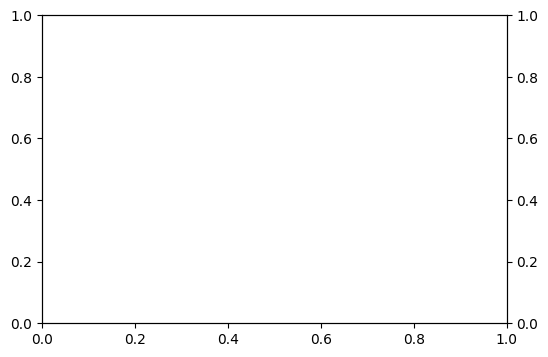

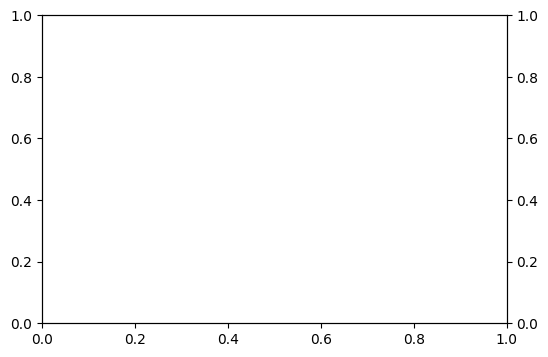

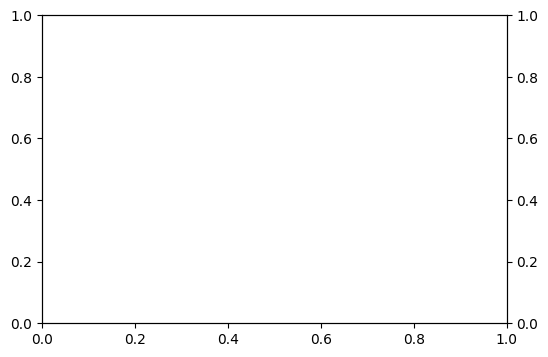

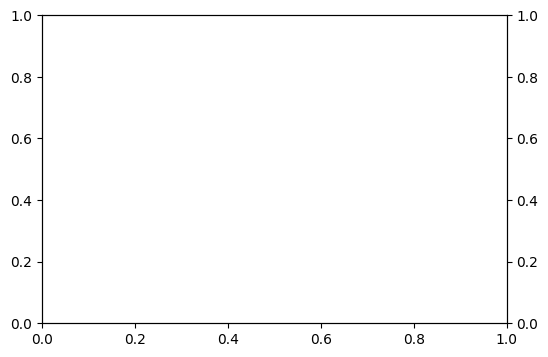

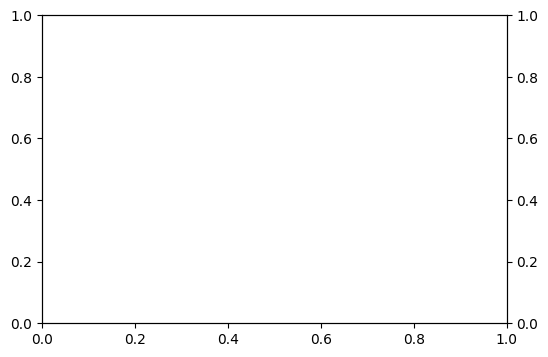

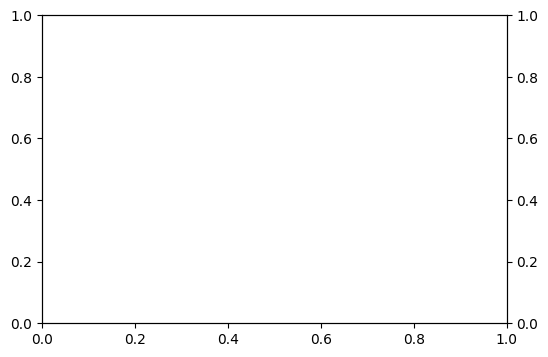

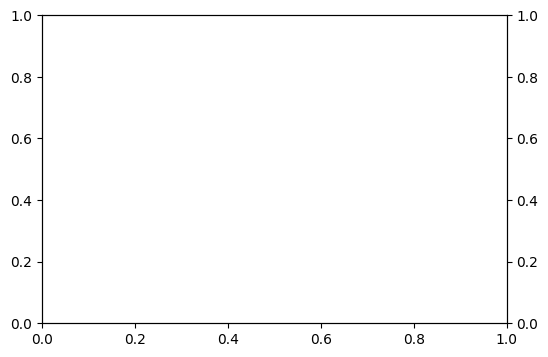

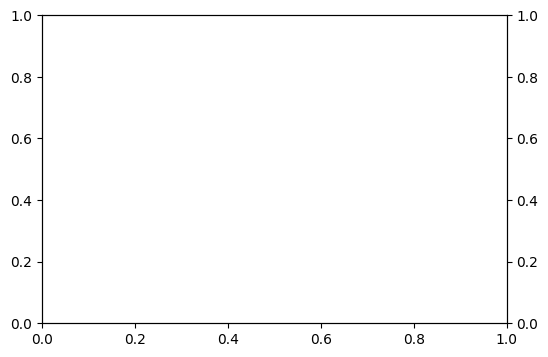

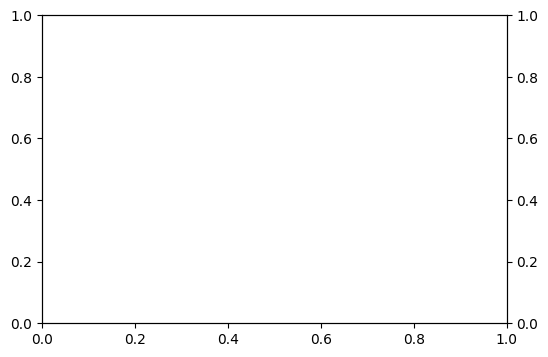

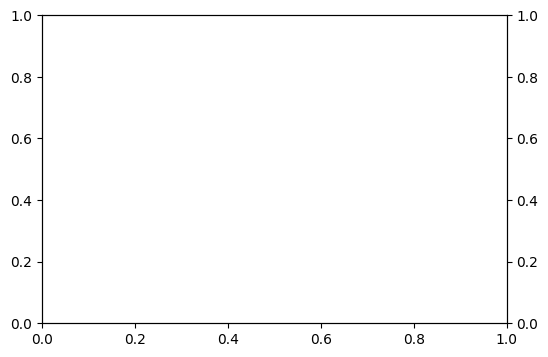

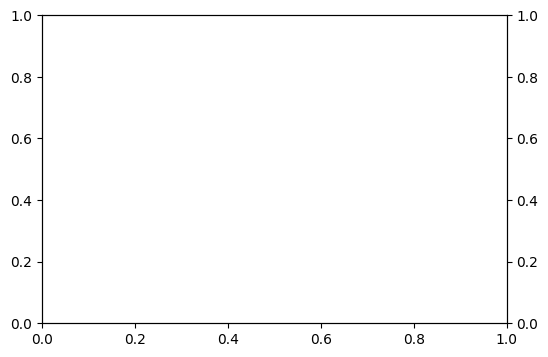

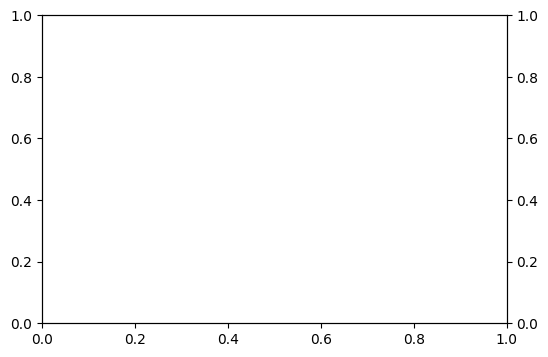

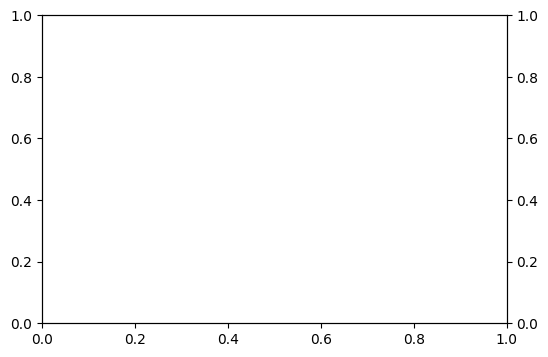

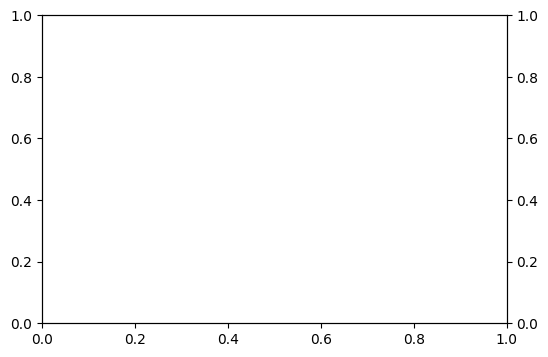

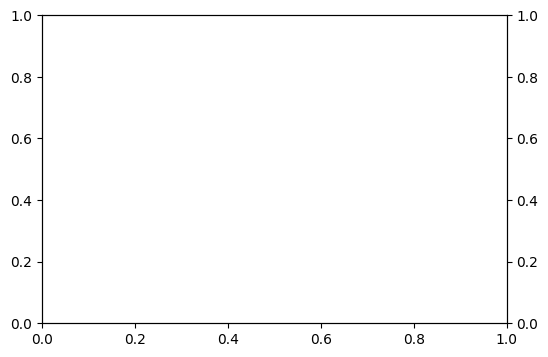

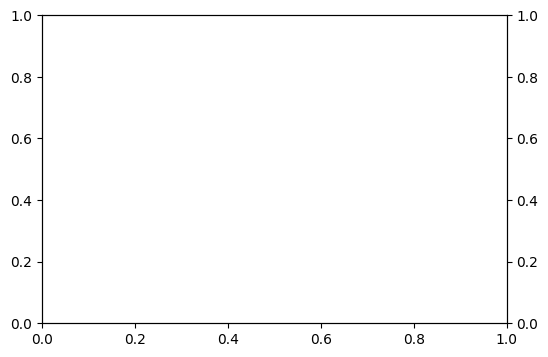

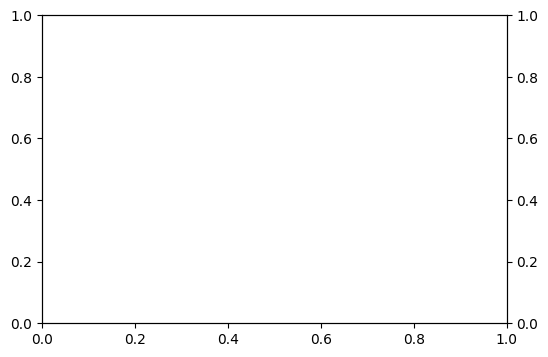

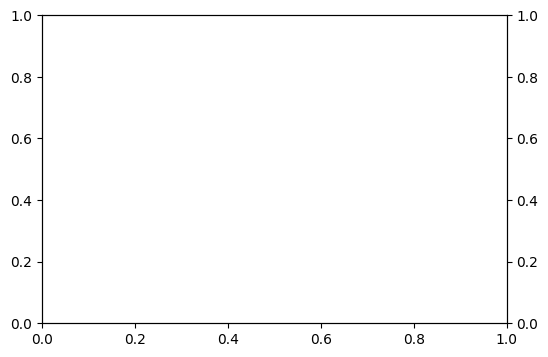

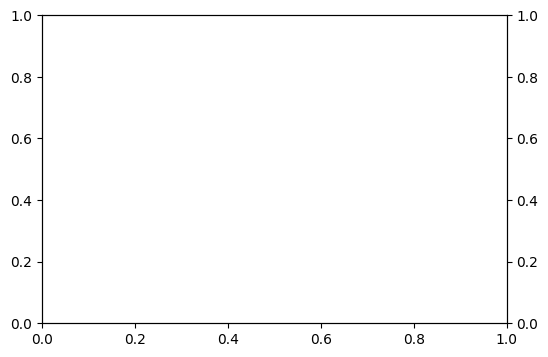

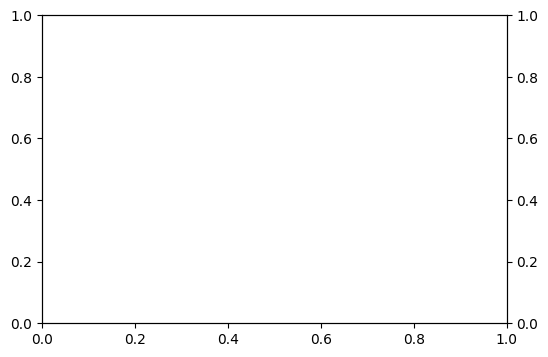

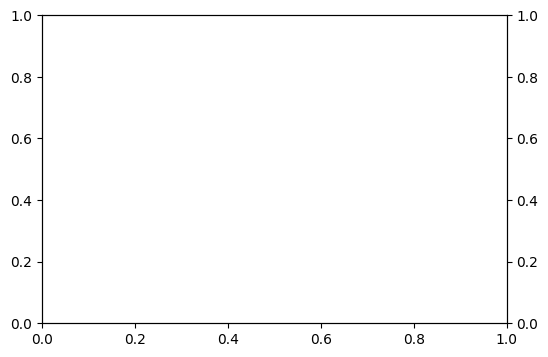

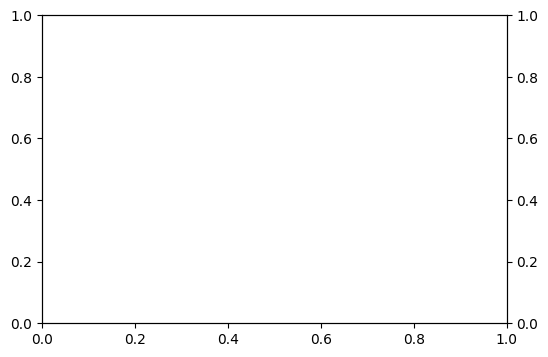

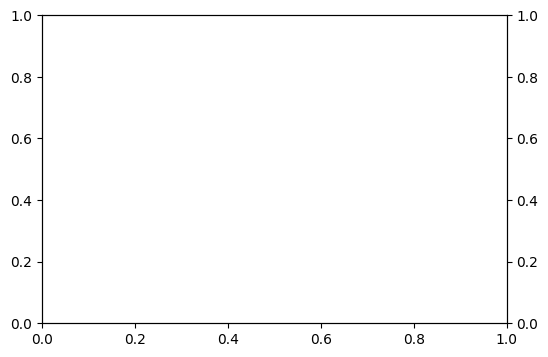

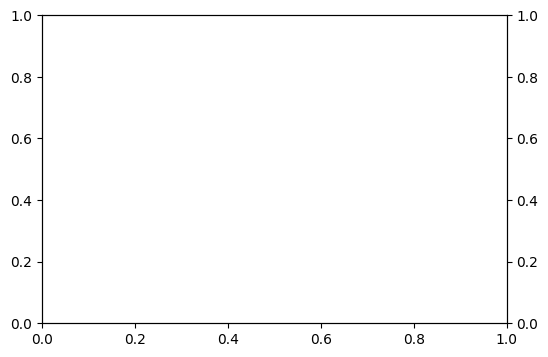

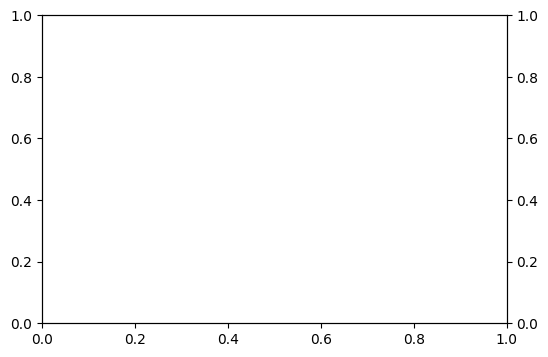

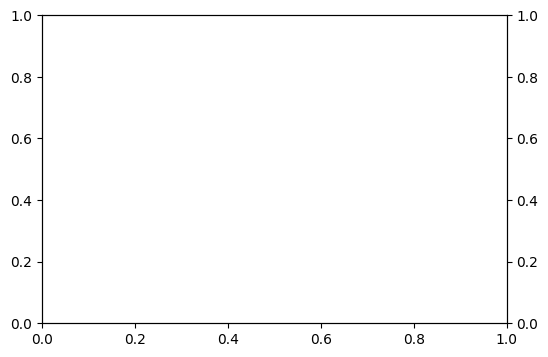

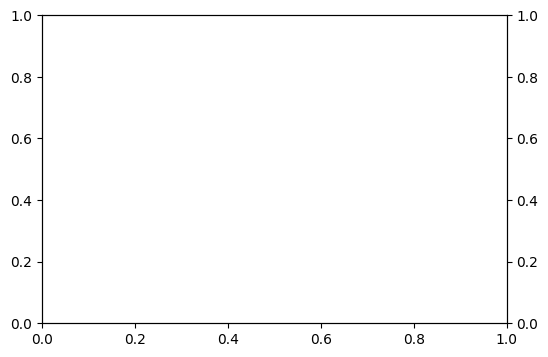

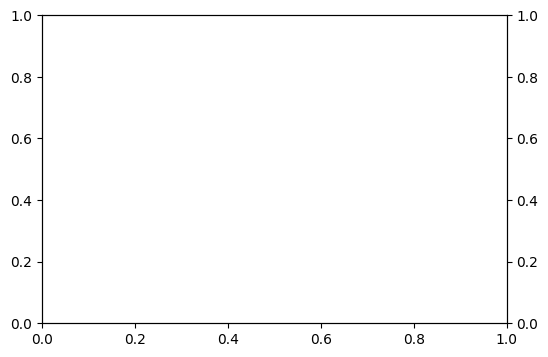

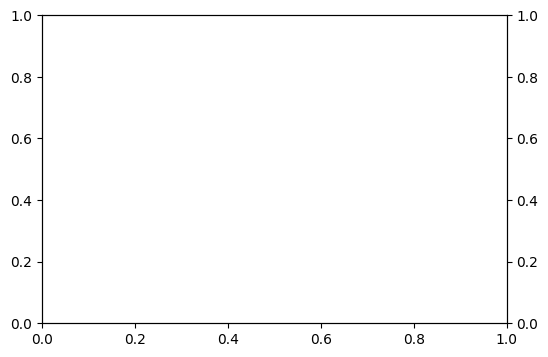

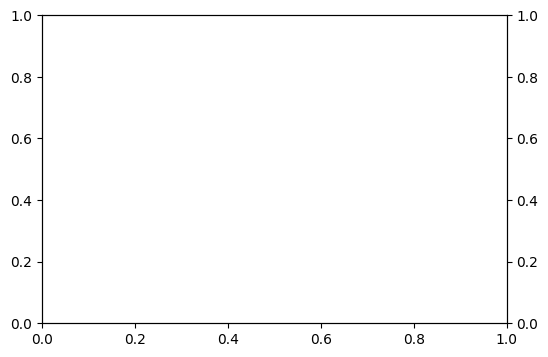

In [16]:
N = 10**4

#G = nx.fast_gnp_random_graph(N, 8/N, seed=chosen_seed)
#G = nx.watts_strogatz_graph(N, 8, 0.1, seed=chosen_seed)
G = nx.barabasi_albert_graph(N, 8, seed=chosen_seed)

tmax = 250
iterations = 5  # run 5 simulations
 # transmission rate
tau_boundaries = np.arange(0.04, 0.09, 0.01)
# random fraction initially infected
rho_boundaries = np.arange(0.005, 0.011, 0.001) 
gamma = 0.08  # recovery rate
alpha = 0.1 # latent period rate

seed = 0

times = []
for tau in tau_boundaries:
    for rho in rho_boundaries:
    
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            start_time = time.time()
            t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)
            end_time = time.time()
            times.append(end_time - start_time)
            
            S = np.array(S)
            E = np.array(E)
            I = np.array(I)
            R = np.array(R)

            #ax.plot(t, I, color = 'k', alpha=0.3)

            print(seed)
            seed += 1       

In [20]:
# 2.97+-0.32
np.array(times).mean(), np.array(times).std()


(np.float64(2.96792325814565), np.float64(0.32075796399606393))

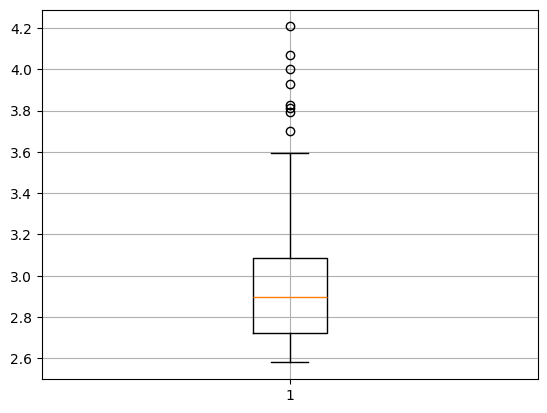

In [24]:
plt.boxplot(np.array(times));
plt.grid()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


C:\Users\105\AppData\Local\Temp\ipykernel_15708\1368723595.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(6, 4))


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


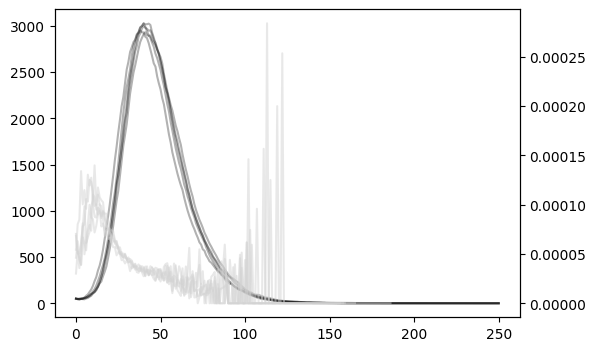

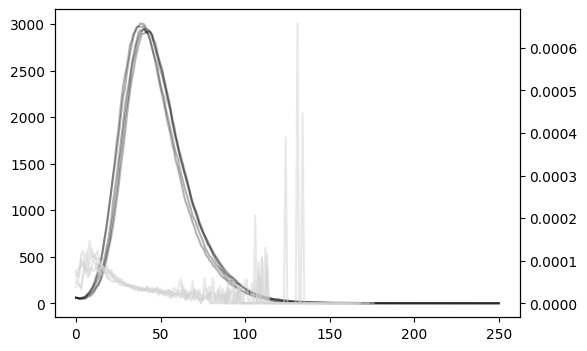

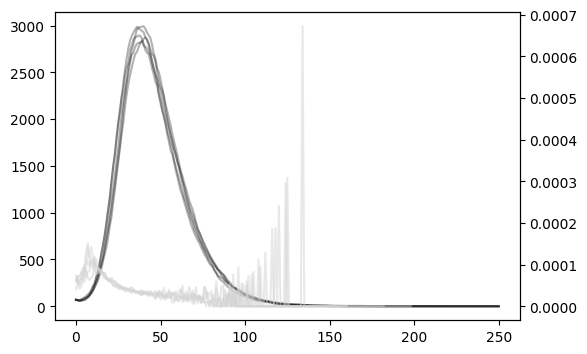

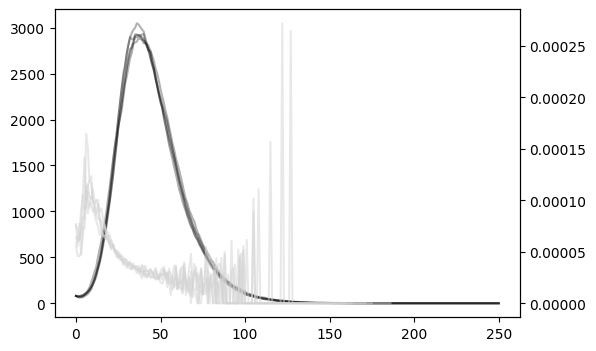

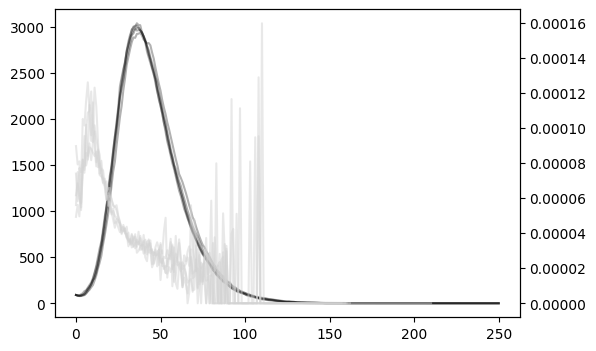

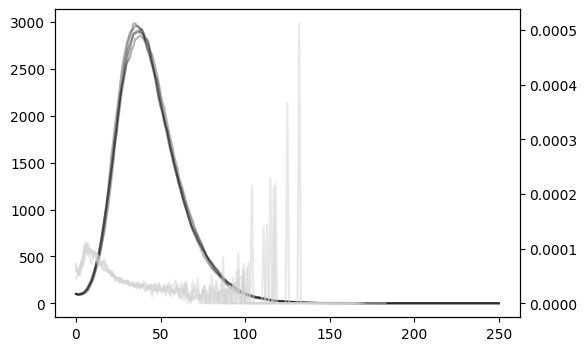

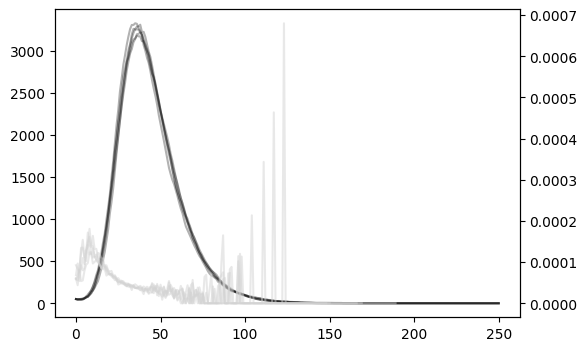

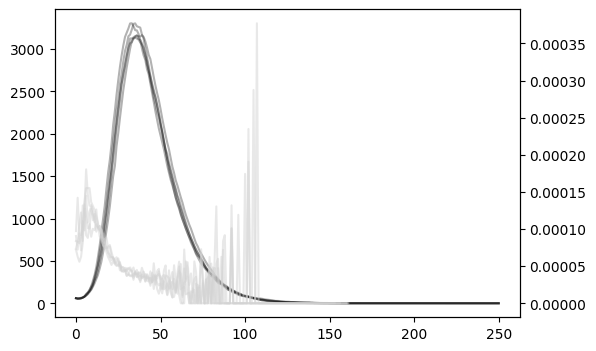

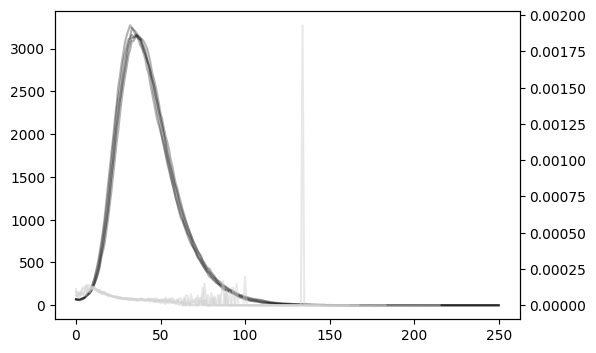

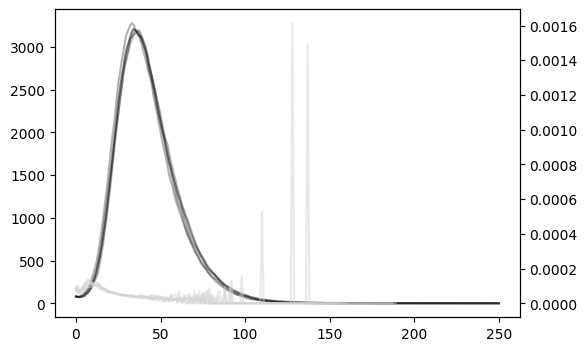

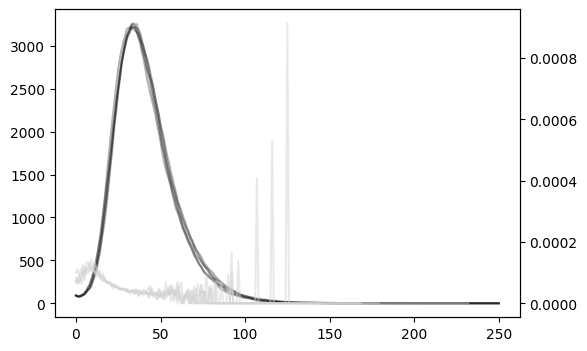

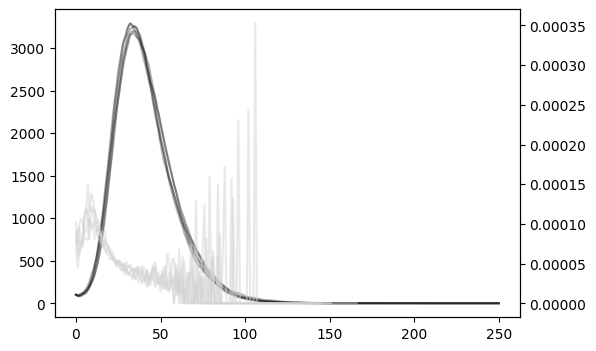

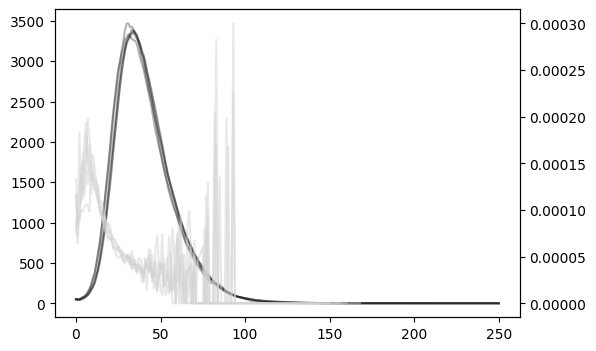

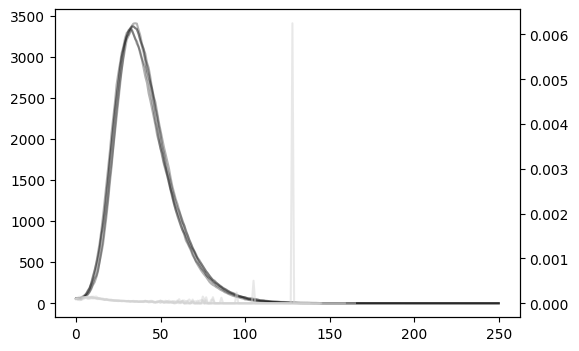

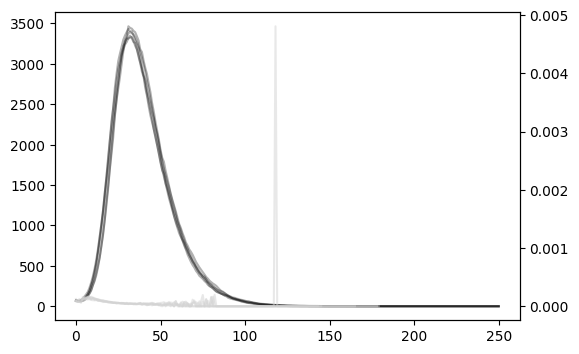

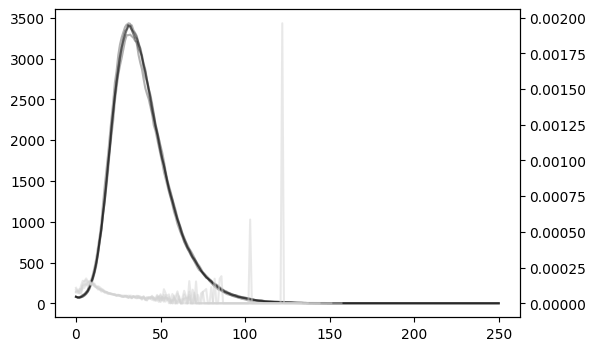

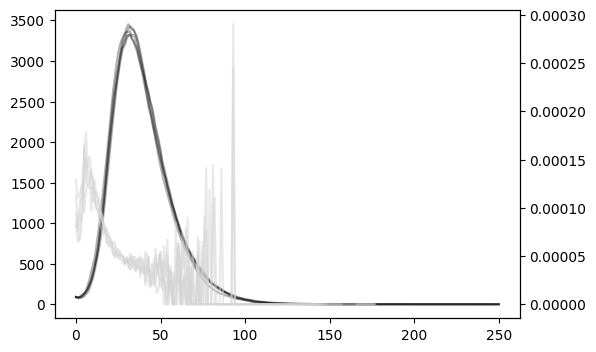

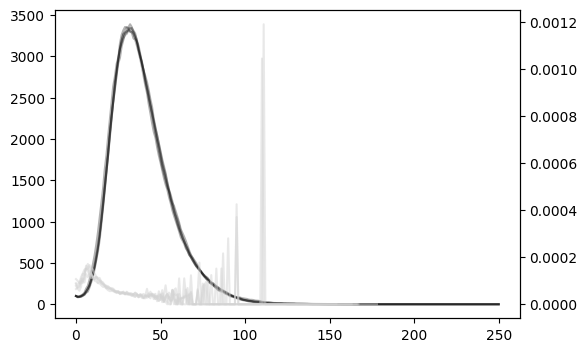

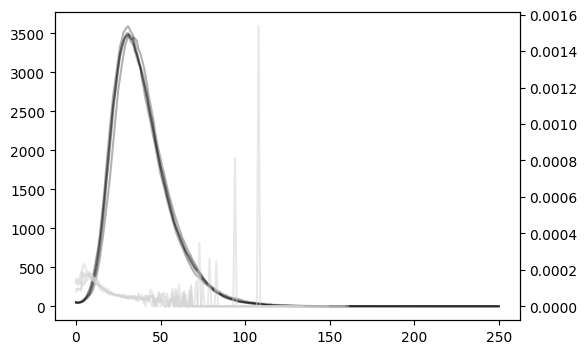

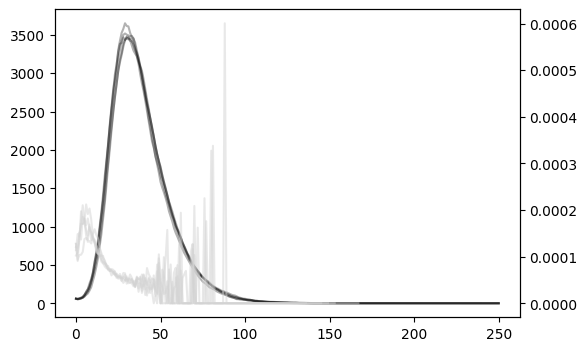

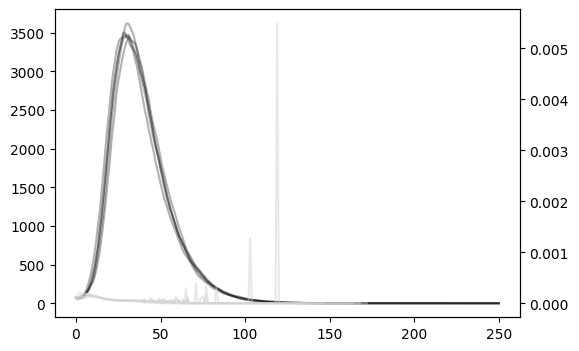

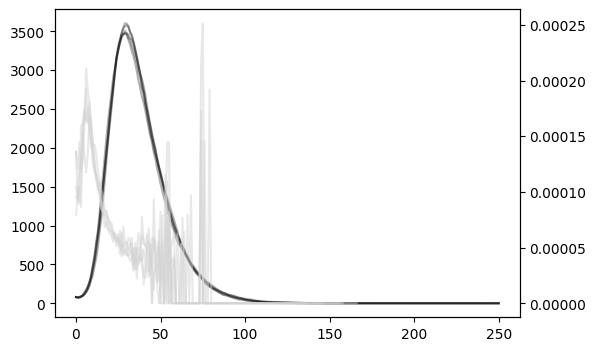

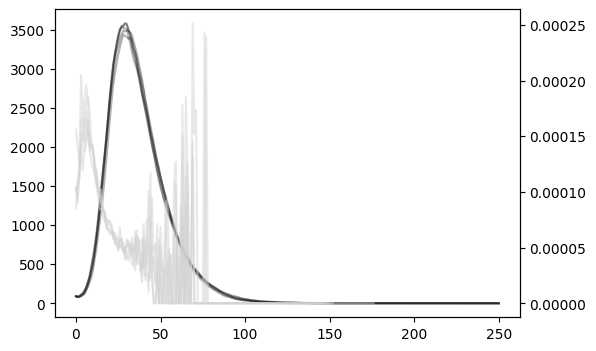

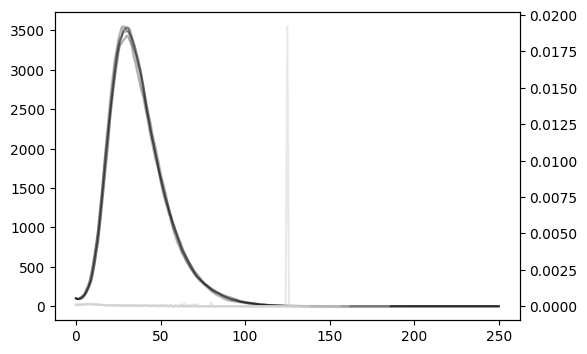

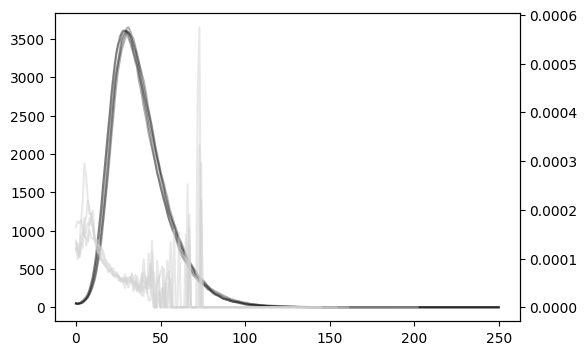

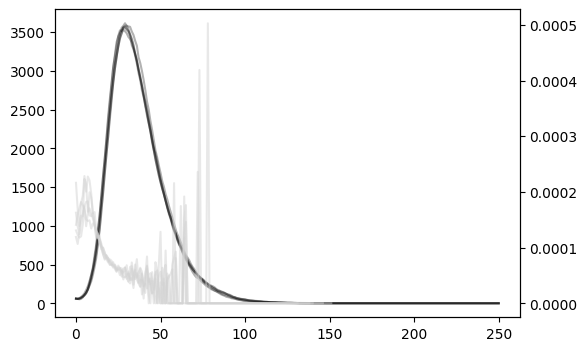

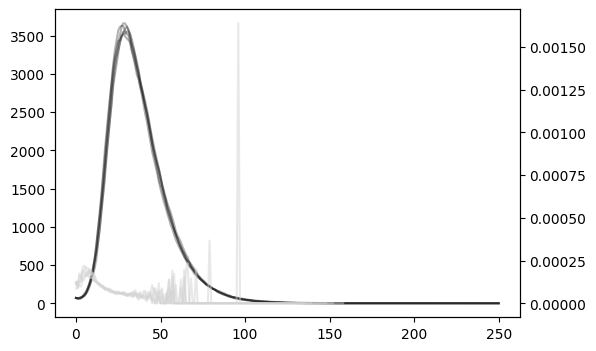

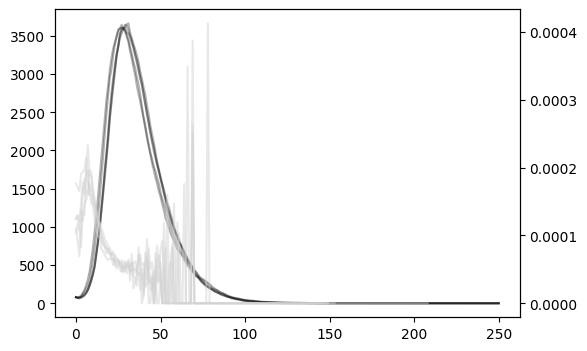

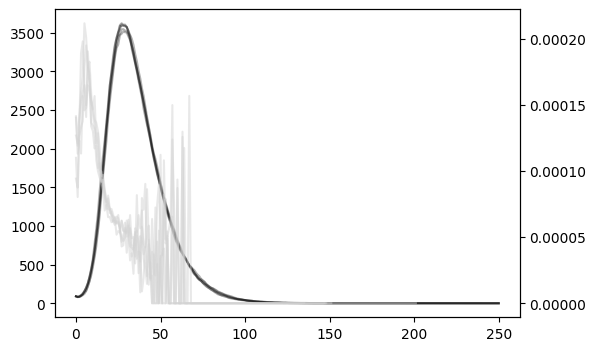

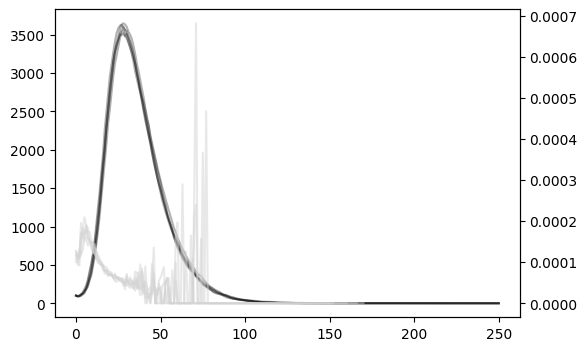

In [25]:
N = 10**4
chosen_seed = np.random.RandomState(42)
#G = nx.fast_gnp_random_graph(N, 8/N, seed=chosen_seed)
#G = nx.watts_strogatz_graph(N, 8, 0.1, seed=chosen_seed)
G = nx.barabasi_albert_graph(N, 8, seed=chosen_seed)

tmax = 250
iterations = 5  # run 5 simulations
 # transmission rate
tau_boundaries = np.arange(0.04, 0.09, 0.01)
# random fraction initially infected
rho_boundaries = np.arange(0.005, 0.011, 0.001) 
gamma = 0.08  # recovery rate
alpha = 0.1 # latent period rate

seed = 0

times = []
for tau in tau_boundaries:
    for rho in rho_boundaries:
    
        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

            S = np.array(S)
            E = np.array(E)
            I = np.array(I)
            R = np.array(R)

            ax.plot(t, I, color = 'k', alpha=0.3)

            # compute betas values
            beta_values = []
            num_days = len(t)
            for i in range(num_days - 1):
                if S[i] > 0 and I[i] > 0:
                    beta = - (S[i + 1] - S[i]) / (S[i] * I[i])
                else:
                    beta = np.nan
                beta_values.append(beta)
            beta_values.append(np.nan)
            ax_beta.plot(beta_values, color='lightgray', alpha=0.5)
            # store the simulation results in a dataFrame
            df_sim = pd.DataFrame({
            "S": S,
            "E": E,
            "I": I,
            "R": R,
            "Beta": beta_values
            })
            # save the results to a csv file
            output_file = f"seir_seed_{seed}.csv"
            df_sim.to_csv(f'initial_data/test_ba_10k/{output_file}', index=False)
            print(seed)
            seed += 1       

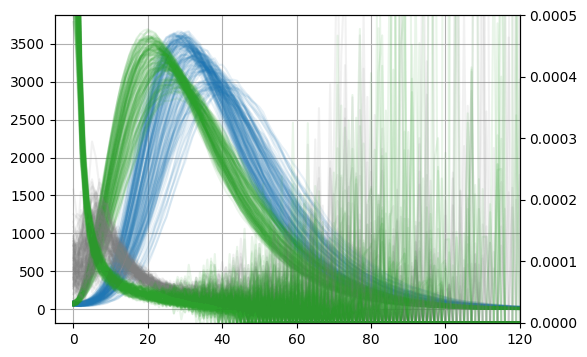

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()

files = glob.glob('initial_data/test_ba_10k/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:blue', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:gray', alpha=0.1)
    
files = glob.glob('../hybrid_surrogate2/sim_data/new_ba_10000/*.csv')
for file in files:
    df = pd.read_csv(file)
    ax.plot(df.I, color='tab:green', alpha=0.1)
    ax_beta.plot(df.Beta, color='tab:green', alpha=0.1) 
    
ax_beta.set_ylim(-1e-6,5e-4)
ax.set_xlim(-5, 120)
ax.grid()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax_beta = ax.twinx()


    
ax_beta.set_ylim(-1e-6,5e-4)
ax.grid()

0
1


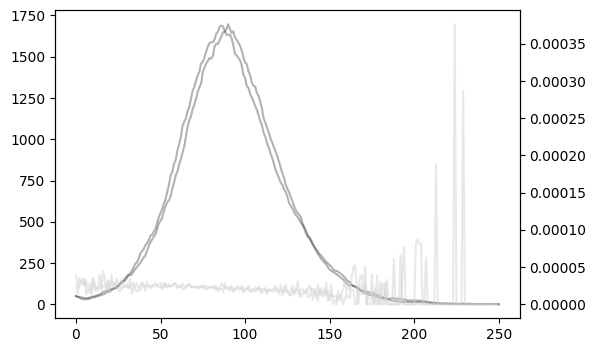

In [17]:
# parameters for the network

N = 10**4

#G = nx.fast_gnp_random_graph(N, 8/N, seed=chosen_seed)
#G = nx.watts_strogatz_graph(N, 8, 0.1, seed=chosen_seed)
G = nx.barabasi_albert_graph(N, 8, seed=chosen_seed)

tmax = 250
iterations = 2  # run 5 simulations
 # transmission rate
tau_boundaries = np.arange(0.04, 0.09, 0.01)
# random fraction initially infected
rho_boundaries = np.arange(0.005, 0.011, 0.001) 
gamma = 0.08  # recovery rate
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:

        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

            S = np.array(S)
            E = np.array(E)
            I = np.array(I)
            R = np.array(R)

            ax.plot(t, I, color = 'k', alpha=0.3)

            # compute betas values
            beta_values = []
            num_days = len(t)
            for i in range(num_days - 1):
                if S[i] > 0 and I[i] > 0:
                    beta = - (S[i + 1] - S[i]) / (S[i] * I[i])
                else:
                    beta = np.nan
                beta_values.append(beta)
            beta_values.append(np.nan)
            ax_beta.plot(beta_values, color='lightgray', alpha=0.5)
            # store the simulation results in a dataFrame
            df_sim = pd.DataFrame({
            "S": S,
            "E": E,
            "I": I,
            "R": R,
            "Beta": beta_values
            })
            # save the results to a csv file
            #output_file = f"seir_seed_{seed}.csv"
            #df_sim.to_csv(f'initial_data/{output_file}', index=False)
            print(seed)
            seed += 1       


In [13]:
nx.barabasi_albert_graph(N, 8)

0
1
2
3
4


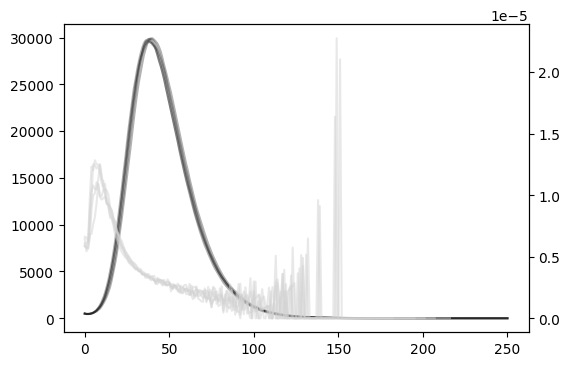

In [10]:
# parameters for the network

N = 10**5

G=nx.barabasi_albert_graph(N, 8)
#G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 5  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:

        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

            S = np.array(S)
            E = np.array(E)
            I = np.array(I)
            R = np.array(R)

            ax.plot(t, I, color = 'k', alpha=0.3)

            # compute betas values
            beta_values = []
            num_days = len(t)
            for i in range(num_days - 1):
                if S[i] > 0 and I[i] > 0:
                    beta = - (S[i + 1] - S[i]) / (S[i] * I[i])
                else:
                    beta = np.nan
                beta_values.append(beta)
            beta_values.append(np.nan)
            ax_beta.plot(beta_values, color='lightgray', alpha=0.5)
            # store the simulation results in a dataFrame
            df_sim = pd.DataFrame({
            "S": S,
            "E": E,
            "I": I,
            "R": R,
            "Beta": beta_values
            })
            # save the results to a csv file
            #output_file = f"seir_seed_{seed}.csv"
            #df_sim.to_csv(f'initial_data/{output_file}', index=False)
            print(seed)
            seed += 1       


0
1
2
3
4


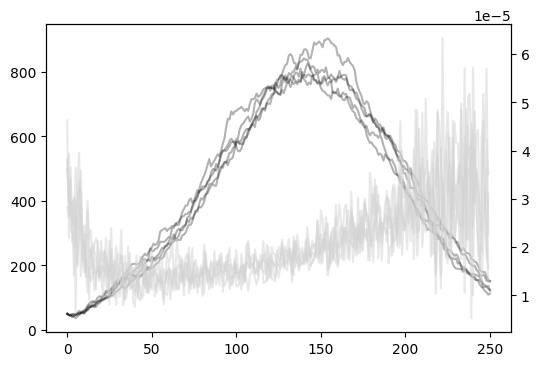

In [9]:
# parameters for the network

N = 10**4

#G=nx.barabasi_albert_graph(N, 8)
G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 5  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:

        fig, ax = plt.subplots(1, 1, figsize=(6, 4))
        ax_beta = ax.twinx()
        for iter in range(0, iterations):
            # SEIR
            t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

            S = np.array(S)
            E = np.array(E)
            I = np.array(I)
            R = np.array(R)

            ax.plot(t, I, color = 'k', alpha=0.3)

            # compute betas values
            beta_values = []
            num_days = len(t)
            for i in range(num_days - 1):
                if S[i] > 0 and I[i] > 0:
                    beta = - (S[i + 1] - S[i]) / (S[i] * I[i])
                else:
                    beta = np.nan
                beta_values.append(beta)
            beta_values.append(np.nan)
            ax_beta.plot(beta_values, color='lightgray', alpha=0.5)
            # store the simulation results in a dataFrame
            df_sim = pd.DataFrame({
            "S": S,
            "E": E,
            "I": I,
            "R": R,
            "Beta": beta_values
            })
            # save the results to a csv file
            #output_file = f"seir_seed_{seed}.csv"
            #df_sim.to_csv(f'initial_data/{output_file}', index=False)
            print(seed)
            seed += 1       


Text(0, 0.5, 'Number of nodes')

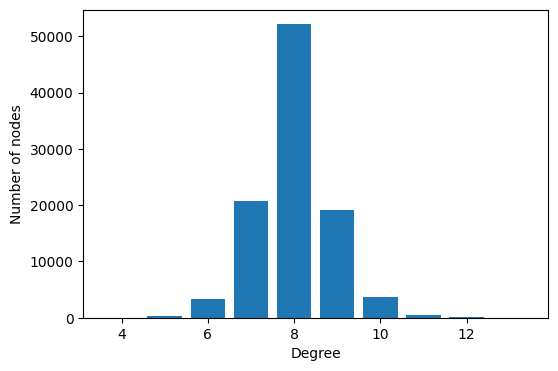

In [38]:
# parameters for the network

N = 10**5

#G=nx.barabasi_albert_graph(N, 5)
G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.fast_gnp_random_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

        
plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

In [15]:
8/50000

0.00016

Text(0, 0.5, 'Number of nodes')

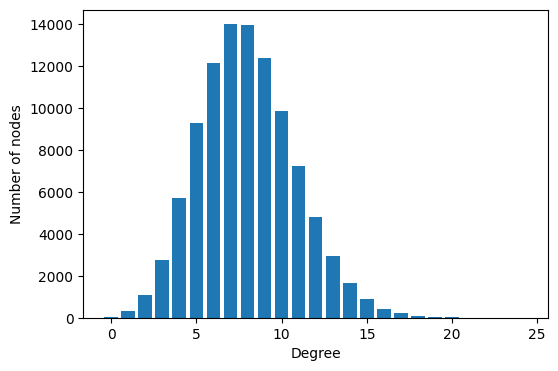

In [16]:
# parameters for the network

N = 10**5

# чтобы средняя степень была 8
G = nx.fast_gnp_random_graph(N, 8/N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)

        
plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

(0.0, 30.0)

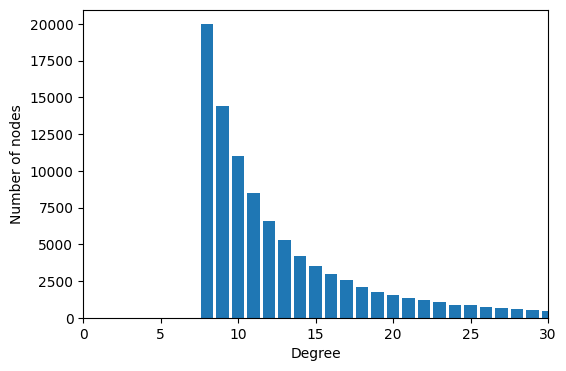

In [11]:
# parameters for the network

N = 10**5

G=nx.barabasi_albert_graph(N, 8)
#G = nx.watts_strogatz_graph(N, 8, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)
        

plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.xlim(0,30)

Text(0, 0.5, 'Number of nodes')

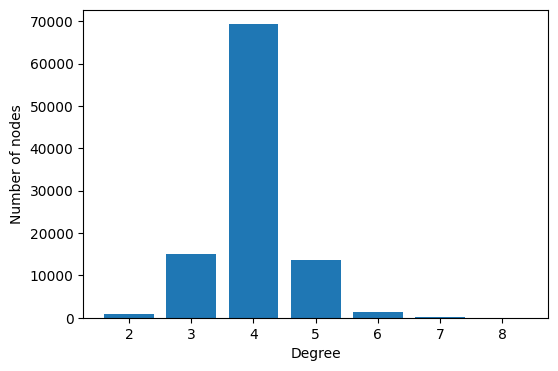

In [40]:
# parameters for the network

N = 10**5

#G=nx.barabasi_albert_graph(N, 5)
G = nx.watts_strogatz_graph(N, 5, 0.1)
#G = nx.complete_graph(N)

tmax = 250
iterations = 1  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

seed = 0
for tau in tau_boundaries[:1]:
    for rho in rho_boundaries[:1]:
        t, S, E, I, R = SEIR_network(G, tau, alpha, gamma, rho, tmax)
        
        
plt.subplots(1,1,figsize=(6,4))

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

plt.bar(*np.unique(degree_sequence, return_counts=True))
plt.xlabel("Degree")
plt.ylabel("Number of nodes")

## split

Generate csv-file with value of parameters for every seeds

In [6]:
seed_number = 0

iterations = 50  # run 5 simulations
tau_boundaries = np.arange(0.04, 0.09, 0.01)         # transmission rate
gamma = 0.08  # recovery rate
rho_boundaries = np.arange(0.005, 0.011, 0.001)     # random fraction initially infected
alpha = 0.1 # latent period rate

parameters = pd.DataFrame(columns = ['seed_number','tau', 'rho'])
for tau in tau_boundaries:
    for rho in rho_boundaries:
        for iter in range(0, iterations):
            parameters = pd.concat([parameters,
                                    pd.DataFrame({'seed_number':[seed_number],
                                                  'tau':[tau],'rho':[rho]})
                                   ],ignore_index=True)
            seed_number += 1 

# save the results to a csv file
parameters.to_csv('initial_data/seeds_parameters.csv', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_11904\2225653252.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  parameters = pd.concat([parameters,


END


Train-val-test split seeds numbers

In [10]:
df = pd.read_csv('initial_data/seeds_parameters.csv')
X = df.drop(columns=['tau', 'rho'])
y = df[['tau', 'rho']]
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=y)
y = y.loc[X_train.index]
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=42, stratify=y)
X_train = X_train.sort_values(by = ['seed_number'])
X_val = X_val.sort_values(by = ['seed_number'])
X_test = X_test.sort_values(by = ['seed_number'])

Sharing the seeds on train and test and generate csv-file with value of initial and finite indexies

In [11]:
train_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_train['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    train_index = pd.concat([train_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'train/seir_seed_{i}.csv', index=False)
train_index.to_csv('train/train_index.csv',index=False)

val_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_val['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    val_index = pd.concat([val_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'val/seir_seed_{i}.csv', index=False)
val_index.to_csv('val/val_index.csv',index=False)

test_index = pd.DataFrame(columns = ['initial','finite'])
for i, seed_number in enumerate(X_test['seed_number'].values):
    df = pd.read_csv(f'initial_data/seir_seed_{seed_number}.csv')
    df = df.iloc[:-1]
    test_index = pd.concat([test_index, pd.DataFrame({'initial':[seed_number],'finite':[i]})],ignore_index=True)
    df.fillna(0, inplace=True)
    df.to_csv(f'test/seir_seed_{i}.csv', index=False)
test_index.to_csv('test/test_index.csv',index=False)



Generate csv-file with median Beta values

In [12]:
betas = pd.DataFrame()

for i in range(960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0] > 1:
        df.loc[epidemic_end[0]:, 'Beta'] = -2  # поправил на df.loc[...] вместо df['Beta'].loc[...]
    
    df = df[['Beta']]
    df.columns = [i]  # Переименовываем колонку 'Beta' в номер сида
    betas = pd.concat([betas, df], axis=1)

median_beta = betas[betas > 0].median(axis=1)
median_beta.to_csv('train/median_beta.csv', header=['median_beta'])



<Axes: >

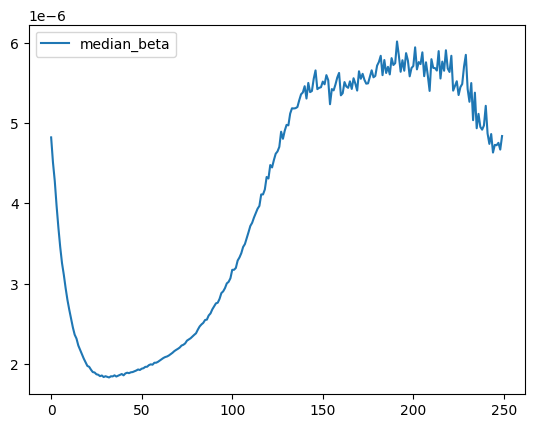

In [15]:
pd.read_csv('train/median_beta.csv', index_col=0).plot()

(-1e-07, 1e-05)

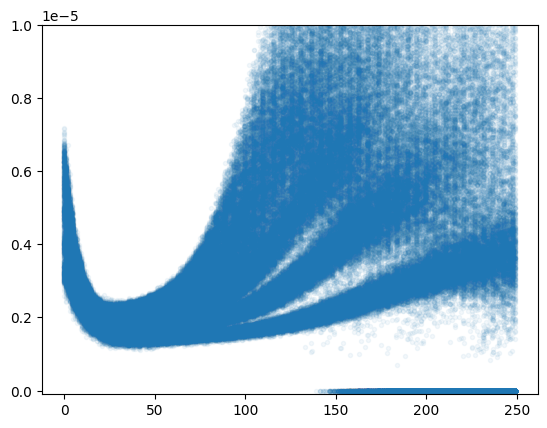

In [3]:
for i in np.arange(0,960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    plt.plot(df['Beta'].values, alpha=0.05, color = 'tab:blue', ls='', marker='.')
    
plt.ylim(-1e-7,1e-5)

In [6]:
import predict_Beta_I

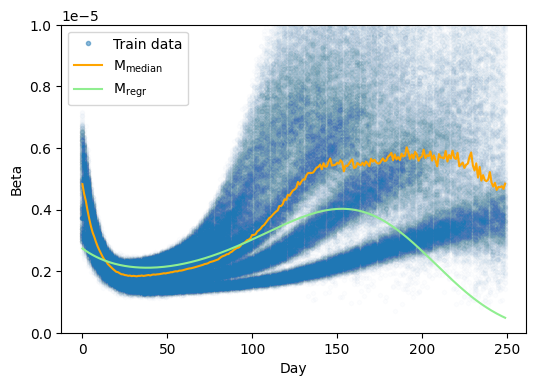

In [8]:
all_betas = pd.DataFrame()
for i in np.arange(960):
    df = pd.read_csv(f'train/seir_seed_{i}.csv')
    epidemic_end = df[(df['E'] == 0) & (df['I'] == 0)].index
    if epidemic_end.shape[0]>1:
        df.loc[epidemic_end[1]:,'Beta'] = -2
    all_betas = pd.concat([all_betas, df[['Beta']]], axis=1)


fig = plt.figure(figsize=(6, 4)) 
plt.plot(all_betas.iloc[0,0], marker='.', ls='',alpha=0.5,
        label='Train data')
plt.plot(all_betas[all_betas>0], marker='.', ls='',alpha=0.01,
        color='tab:blue');
plt.plot(all_betas[all_betas>0].median(axis=1), ls='-', color='orange', 
         label='$\mathregular{M_{median}}$')

sigma = 0.1
gamma = 0.08
beggining_beta, predicted_beta, predicted_I = predict_Beta_I.predict_beta(
                            'seir', df, 'regression (day)', 
                             np.arange(30, df.shape[0]), False, 0, sigma, gamma,
                             features_reg = ['day','prev_I','S','E','I','R'])

plt.plot(df.index.values, 
         np.concatenate((beggining_beta, predicted_beta)), ls='-', color='lightgreen', 
         label='$\mathregular{M_{regr}}$')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Beta')
plt.ylim(0,1e-5)
plt.legend()
plt.savefig(f'results/Beta_trajectories.pdf', 
            format='pdf',  bbox_inches='tight') 

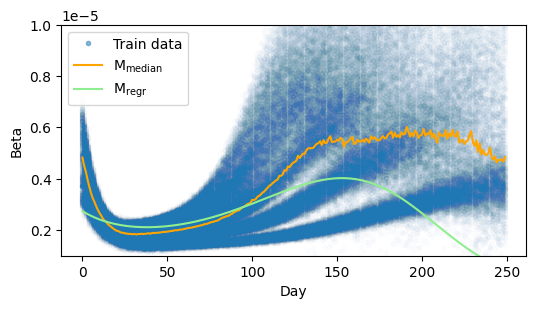

In [19]:
fig = plt.figure(figsize=(6, 3)) 
plt.plot(all_betas.iloc[0,0], marker='.', ls='',alpha=0.5,
        label='Train data')
plt.plot(all_betas[all_betas>0], marker='.', ls='',alpha=0.01,
        color='tab:blue');
plt.plot(all_betas[all_betas>0].median(axis=1), ls='-', color='orange', 
         label='$\mathregular{M_{median}}$')

plt.plot(df.index.values, 
         np.concatenate((beggining_beta, predicted_beta)), ls='-', color='lightgreen', 
         label='$\mathregular{M_{regr}}$')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Beta')
plt.ylim(1e-6,1e-5)

plt.legend()
plt.savefig(f'results/Beta_trajectories.png', 
            format='png',  bbox_inches='tight') 

## split new

In [3]:
folder = 'initial_data/new_ba_10000/'
files = glob.glob(folder + '*.csv')

In [4]:
data = []
for file in files:
    fname = file.split('\\')[-1]
    beta, gamma, delta, init_inf_frac, \
        init_rec_frac = fname.split('_seed')[0][2:].split('_')
    data.append([file, beta, gamma, delta, \
                 init_inf_frac, init_rec_frac])

In [5]:
df_params = pd.DataFrame(data, 
                         columns = ['file','beta','sigma',
                                    'gamma','init_inf','init_rec'])
df_params.head()

,file,beta,sigma,gamma,init_inf,init_rec
0,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0
1,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0
2,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0
3,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0
4,initial_data/new_ba_10000\p_0.04_0.1_0.08_0.00...,0.04,0.1,0.08,0.005,0


In [6]:
X = df_params[['file']]
y = df_params.drop(columns='file')

X_train, X_test = train_test_split(X, test_size=0.2, 
                                   random_state=42, stratify=y)
y = y.loc[X_train.index]
X_train, X_val = train_test_split(X_train, test_size=0.2, 
                                  random_state=42, stratify=y)
X_train = X_train.sort_values(by = ['file'])
X_val = X_val.sort_values(by = ['file'])
X_test = X_test.sort_values(by = ['file'])

In [7]:
X_train.shape, X_val.shape, X_test.shape

((960, 1), (240, 1), (300, 1))

In [8]:
df_params['set'] = ''
df_params.loc[df_params['file'].isin(X_train.file),
             'set'] = 'train'
df_params.loc[df_params['file'].isin(X_val.file),
             'set'] = 'val'
df_params.loc[df_params['file'].isin(X_test.file),
             'set'] = 'test'
df_params.set.value_counts()

set
train    960
test     300
val      240
Name: count, dtype: int64

In [9]:
df_params.to_csv('initial_data/new_seeds_parameters.csv',
                 index=False)

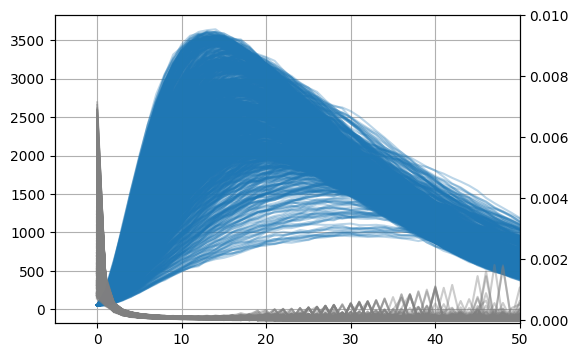

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax_b = ax.twinx()

train_seeds = df_params[df_params.set!='test']['file']
for i in train_seeds:
    df = pd.read_csv(i)
    ax.plot(df.I, color='tab:blue', alpha=0.3)
    ax_b.plot(df.Beta, color='gray', alpha=0.4)
    
ax.set_xlim(-5,50)
ax_b.set_ylim(-1e-4, 1e-2)

ax.grid()